# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [47]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [48]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [49]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


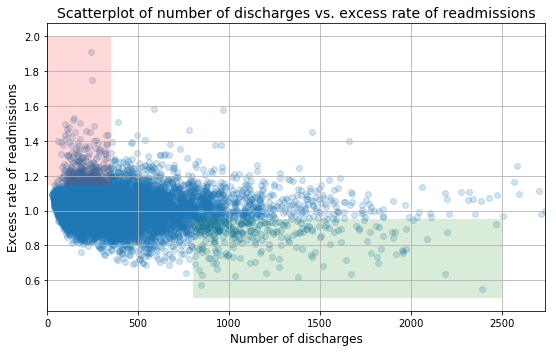

In [50]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

I'm not sure to agree or disagree with the above analysis and recommendations. Because the plot is not clear and supportable enough to get the results and related recommendations. I think we need do more statistical analysis.

In [51]:
import scipy.stats as st
import statsmodels.stats.api as sms

In [52]:
df = clean_hospital_read_df

In [53]:
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


Check the red and green areas of the plot.

In [54]:
# Excess Readmission Ratio for Number of Discharges < 350
df1 = df[df['Number of Discharges']<350]
df1_e = df1['Excess Readmission Ratio']
df1_e = df1_e.dropna(how='any')

In [55]:
# 99% Confidence interval
st.t.interval(0.99, len(df1_e)-1, loc=np.mean(df1_e), scale=st.sem(df1_e))

(1.01075537880231, 1.0159089538641646)

In [56]:
# 99% Confidence interval for large sample size
st.norm.interval(0.99, loc=np.mean(df1_e), scale=st.sem(df1_e))

(1.0107560817175512, 1.0159082509489235)

In [57]:
# Excess Readmission Ratio for Number of Discharges in (800, 2500)
df2 = df[(df['Number of Discharges']>800) & (df['Number of Discharges']<2500)]
df2_e = df2['Excess Readmission Ratio']
df2_e = df2_e.dropna(how='any')

In [58]:
# 99% Confidence interval
st.t.interval(0.99, len(df2_e)-1, loc=np.mean(df2_e), scale=st.sem(df2_e))

(0.97495149739658182, 0.99515288955504944)

In [59]:
# 99% Confidence interval for large sample size
st.norm.interval(0.99, loc=np.mean(df2_e), scale=st.sem(df2_e))

(0.97497320572700563, 0.99513118122462563)

In hospitals/facilities with number of discharges < 350, we have 99% conficence that their mean Excess Readmission Ratio is between 1.011 and 1.016; and in hospitals/facilities with number of discharges between 800 and 2500, we have 99% conficence that their mean Excess Readmission Ratio is between 0.975 and 0.995.  
* With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)  
* With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)  
These two conclusions are correct.

In [60]:
# In hospitals/facilities with number of discharges < 100, 
# mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
df1_e.mean()

1.0133321663332373

In [61]:
n1 = len(df1_e)
df1_eb = df1_e[df1_e>1]
n1b = len(df1_eb)
n1b/n1

0.5331523292369248

In [62]:
# In hospitals/facilities with number of discharges > 1000, 
# mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1
df2_e.mean()

0.9850521934758156

In [63]:
n2 = len(df2_e)
df2_eb = df2_e[df2_e>1]
n2b = len(df2_eb)
n2b/n2

0.47131608548931386

So Statistics in Preliminary Report are correct.

In [64]:
# Excess Readmission Ratio for Number of Discharges < 300
df1 = df[df['Number of Discharges']<300]
df1_e = df1['Excess Readmission Ratio']
df1_e = df1_e.dropna(how='any')

In [65]:
# 99% Confidence interval
st.t.interval(0.99, len(df1_e)-1, loc=np.mean(df1_e), scale=st.sem(df1_e))

(1.0115190034853125, 1.0169574208761765)

In hospitals/facilities with number of discharges < 300, we have 99% conficence that their mean Excess Readmission Ratio is between 1.012 and 1.017  
Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

__1. Setup an appropriate hypothesis test.__

Null hypothesis: There is no correlation between hospital capacity (number of discharges) and readmission rates.  
**H0:** Mean excess readmission rate for hospitals/facilities are same with different number of discharges  
**H1:** Mean excess readmission rate for hospitals/facilities are different with different number of discharges     

__2. Compute and report the observed significance value (or p-value).__   
__3. Report statistical significance for  α  = .01.__

In [66]:
len(df)

11578

In [67]:
# Excess Readmission Ratio
df_e = df['Excess Readmission Ratio']
df_e = df_e.dropna(how='any')

Compare two methods to get the 99% confidence interval of mean Excess Readmission Ration of the sample

In [68]:
# 99% Confidence interval
st.t.interval(0.99, len(df_e)-1, loc=np.mean(df_e), scale=st.sem(df_e))

(1.0052941715142687, 1.0097133956771605)

In [69]:
# 99% Confidence interval for large sample size
st.norm.interval(0.99, loc=np.mean(df_e), scale=st.sem(df_e))

(1.0052945383809102, 1.0097130288105189)

The results are relatively same. The first one may be more accurate.   
So we have 99% conficence that the whole sample mean Excess Readmission Ratio is between 1.0053 and 1.0097

In [70]:
# Sample mean
m = df_e.mean()
m

1.0075037835957146

In [71]:
# Margin of error
h = m - 1.0052941715142687
h

0.0022096120814458775

Analyze sample for Number of Discharges < 100, to see the p-value of the practical sample mean.

In [72]:
# Excess Readmission Ratio for Number of Discharges < 100
df1 = df[df['Number of Discharges']<100]
df1_e = df1['Excess Readmission Ratio']
df1_e = df1_e.dropna(how='any')

In [73]:
# Sample mean 
m1 = df1_e.mean()
m1

1.0226183501683506

In [74]:
# Z score
z1 = (m1-m)/h
z1

6.840371076693992

When I looked this number up on Z-table, I found a probability of 1 of Z being less than this value.

In [75]:
# p-value for sample mean = 1.02262
p1 = 1-1
p1

0

So we will reject the null hypothesis and there IS correlation between hospital capacity (number of discharges) and readmission rates.

Analyze sample for Number of Discharges > 1000, to see the p-value of the practical sample mean.

In [76]:
# Excess Readmission Ratio for Number of Discharges > 1000
df2 = df[df['Number of Discharges']>1000]
df2_e = df2['Excess Readmission Ratio']
df2_e = df2_e.dropna(how='any')

In [77]:
# Sample mean 
m2 = df2_e.mean()
m2

0.9783354211663071

In [78]:
# Z score
z2 = (m-m2)/h
z2

13.20067113785914

When I looked this number up on Z-table, I found a probability of 1 of Z being less than this value.

In [79]:
# p-value for sample mean = 1.02262
p2 = 1-1
p2

0

So we will reject the null hypothesis and there IS correlation between hospital capacity (number of discharges) and readmission rates.

__4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?__

We have 99% conficence that the whole sample mean Excess Readmission Ratio is between 1.0053 and 1.0097. But for Number of Discharges < 100, the probability of get the practical mean value 1.0226 is 0; for Number of Discharges > 1000, the probability of get the practical mean value 0.9783 is 0. So there is much correlation between hospital capacity (number of discharges) and readmission rates. 

__5. Look at the scatterplot above.__  
* What are the advantages and disadvantages of using this plot to convey information?  
* Construct another plot that conveys the same information in a more direct manner.

The advantage of using this plot to convey information is that it shows the whole picture and trend of the relationship between hospital capacity (number of discharges) and readmission rates. The disadvantages is that the correlation is not clear. 

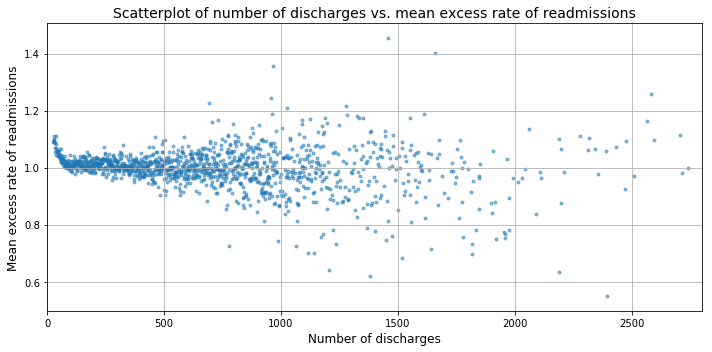

In [80]:
# generate a scatterplot for number of discharges vs. mean excess rate of readmissions
# lists work better with matplotlib scatterplot function
df0 = df[['Number of Discharges', 'Excess Readmission Ratio']]
df0 = df0.dropna(how='any')
df0 = df0.groupby(['Number of Discharges'])
x = df0['Number of Discharges'].unique()
y = df0['Excess Readmission Ratio'].mean()

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y, alpha=0.5, marker='.')

ax.set_xlim([0, 2800])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Mean excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. mean excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

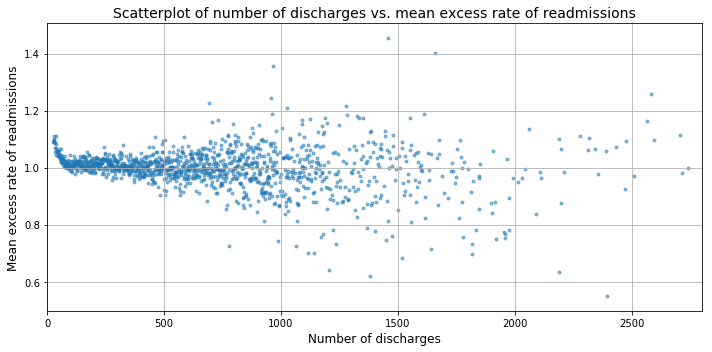

In [81]:
# generate a scatterplot for number of discharges vs. mean excess rate of readmissions
# lists work better with matplotlib scatterplot function
df0 = df[['Number of Discharges', 'Excess Readmission Ratio']]
df0 = df0.dropna(how='any')
n = len(df0)
i = 0
xx = []
yy = []
for a in df0['Number of Discharges'].unique():
    xx.append(a)
    df1 = df0[df0['Number of Discharges']==a]
    m = df1['Excess Readmission Ratio'].mean()
    yy.append(m)
    i += 1

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(xx, yy, alpha=0.5, marker='.')

ax.set_xlim([0, 2800])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Mean excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. mean excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()